In [10]:
%%writefile SAMPLE.TXT
Hello World
Hello Again
Goodbye
file = open("SAMPLE.TXT", "r")

number_of_lines = 0
number_of_words = 0
number_of_characters = 0
for line in file:
  line = line.strip("\n")
won't count \n as character

  words = line.split()
  number_of_lines += 1
  number_of_words += len(words)
  number_of_characters += len(line)

file.close()

print("lines:", number_of_lines, "words:", number_of_words, "characters:", number_of_characters)


Overwriting SAMPLE.TXT


In [7]:
f= open("sample.txt","w+")


In [3]:
for i in range(10):
     f.write("This is line %d\r\n" % (i+1))

In [4]:
f.close()

In [8]:
f=open("sample.txt", "r")

In [11]:
fname = input('Enter the file name:SAMPLE.TXT ')
try:
    fhand = open(fname)
except:
    print('File cannot be opened:', fname)
    exit()

counts = dict()
for line in fhand:
    words = line.split()
    for word in words:
        if word not in counts:
            counts[word] = 1
        else:
            counts[word] += 1

print(counts)

Enter the file name:SAMPLE.TXT SAMPLE.TXT
{'Hello': 2, 'World': 1, 'Again': 1, 'Goodbye': 1, 'file': 1, '=': 6, 'open("SAMPLE.TXT",': 1, '"r")': 1, 'number_of_lines': 2, '0': 3, 'number_of_words': 2, 'number_of_characters': 2, 'for': 1, 'line': 2, 'in': 1, 'file:': 1, 'line.strip("\\n")': 1, "won't": 1, 'count': 1, '\\n': 1, 'as': 1, 'character': 1, 'words': 1, 'line.split()': 1, '+=': 3, '1': 1, 'len(words)': 1, 'len(line)': 1, 'file.close()': 1, 'print("lines:",': 1, 'number_of_lines,': 1, '"words:",': 1, 'number_of_words,': 1, '"characters:",': 1, 'number_of_characters)': 1}


In [2]:
def standardize(data):
    for a in range(2):
        span = max(data[0][a]) - min(data[0][a])
        min_ = min(data[0][a])
        for idx in range(len(data)):
            standardize = (max(data[idx][a]) - min(data[idx][a]))/span
            data[idx][a] = [i/standardize + min_ - min([i/standardize 
                            for i in data[idx][a]]) for i in data[idx][a]]
    return data

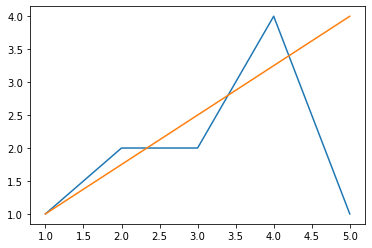

In [5]:
import matplotlib.pyplot as plt
data = [[[1,2,3,4,5],[1,2,2,4,1]], [[1,2,3,4,5], [10,20,30,40,50]]]
limits = [(min(data[1][a]), max(data[1][a])) for a in range(2)]

norm_data = standardize(data)

fig, ax = plt.subplots()

for x, y in norm_data:
    ax.plot(x, y)


ax2.set_ylim(limits[1])
ax3.set_xlim(limits[0])

plt.show()

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [6]:
data = {'gender':['male','female','male','male','female','female','male'],'country':['india','china','china','india','china','britain','china']}
data= pd.DataFrame(data)
le=LabelEncoder()
data['gender']=le.fit_transform(data['gender'])
data['country']=le.fit_transform(data['country'])
print(data)

   gender  country
0       1        2
1       0        1
2       1        1
3       1        2
4       0        1
5       0        0
6       1        1


In [7]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
  
# Load iris data
iris_dataset = load_iris()
  
# Create features and target
X = iris_dataset.data
y = iris_dataset.target
  
# Convert to categorical data by converting data to integers
X = X.astype(int)
  
# Two features with highest chi-squared statistics are selected
chi2_features = SelectKBest(chi2, k = 2)
X_kbest_features = chi2_features.fit_transform(X, y)
  
# Reduced features
print('Original feature number:', X.shape[1])
print('Reduced feature number:', X_kbest_features.shape[1])

Original feature number: 4
Reduced feature number: 2


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline

In [9]:
dir_path='./CMAPSSDATA/'
index_names=['unit_nr','time_cycles']
setting_names=['setting_1','setting_2','setting_3']
sensor_names=['s_{}'.format(i) for i in range(1,22)]
col_names= index_names+setting_names+sensor_names

train=pd.read_csv((dir_path+'train_FD001.txt'),sep='\s+',header=None,names=col_names)
test=pd.read_csv((dir_path+'test_FD001.txt'),sep='\s+',header=None,names=col_names)
y_test=pd.read_csv((dir_path+'RUL_FD001.txt'),sep='\s+',header=None,names=['RUL'])

train.head()




,unit_nr,time_cycles,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,...,s_12,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [10]:
def add_remaining_useful_life(df):
    grouped_by_unit=df.groupby(by="unit_nr")
    max_cycle=grouped_by_unit["time_cycles"].max()
    result_frame=df.merge(max_cycle.to_frame(name='max_cycle'),left_on='unit_nr',right_index=True)
    remaining_useful_life=result_frame["max_cycle"]-result_frame["time_cycles"]
    result_frame["RUL"]=remaining_useful_life
    result_frame=result_frame.drop("max_cycle",axis=1)
    return result_frame
train=add_remaining_useful_life(train)
train[index_names+['RUL']].head()


,unit_nr,time_cycles,RUL
0,1,1,191
1,1,2,190
2,1,3,189
3,1,4,188
4,1,5,187


In [11]:
# drop unwanted columns based on Exploratory Data Analysis conducted earlier
drop_sensors = ['s_1','s_5','s_6','s_10','s_16','s_18','s_19']
drop_labels = setting_names+drop_sensors

X_train = train.drop(drop_labels, axis=1)
# y_train = X_train.pop('RUL')  # pop RUL after dropping NaNs introduced by creating lagged variables

X_test_interim = test.drop(drop_labels, axis=1)

In [12]:
# create lagged variables
remaining_sensors = X_train.columns.difference(index_names+['RUL'])
lag1 = [col + '_lag_1' for col in remaining_sensors]

X_train[lag1] = X_train.groupby('unit_nr')[remaining_sensors].shift(1)
X_train.dropna(inplace=True)

X_test_interim[lag1] = X_test_interim.groupby('unit_nr')[remaining_sensors].shift(1)
X_test_interim.dropna(inplace=True)


# target variable
y_train = X_train.pop('RUL')

# prep test data, since the true RUL values for the test set are only provided for the last time cycle
# of each enginge, the test set is subsetted to represent the same
X_test = X_test_interim.groupby('unit_nr').last().reset_index()

Automatically created module for IPython interactive environment
Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47


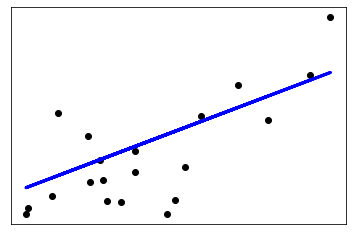

In [12]:
print(__doc__)


# Code source: Jaques Grobler
# License: BSD 3 clause


import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()